# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [114]:
#Here I import all of the libraries that I will be using
import pandas
import numpy
import requests
import tweepy
import json
import timeit
import matplotlib.pyplot as matp

In [5]:
#Here I read the twitter archive enhanced CSV with a pandas function and create a new dataframe titled "ta"
ta = pandas.read_csv('twitter-archive-enhanced.csv')
#here I validate the new dataframe has the content
ta.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
#Here I isue the request library to get the tweet image prediction file
r=requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
#Here I validate the new variable "r" has the content
print(dir(r))


['__attrs__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_content', '_content_consumed', '_next', 'apparent_encoding', 'close', 'connection', 'content', 'cookies', 'elapsed', 'encoding', 'headers', 'history', 'is_permanent_redirect', 'is_redirect', 'iter_content', 'iter_lines', 'json', 'links', 'next', 'ok', 'raise_for_status', 'raw', 'reason', 'request', 'status_code', 'text', 'url']


In [7]:
#Here I query the file and create a dataframe titled ip
open('image_predictions.tsv','wb') as sheet:
    sheet.write(r.content)
ip = pandas.read_table('image_predictions.tsv')
ip.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
#Here I create the api connection for twitter (Key information cleared out to ensure security
consumer_key ='xxx'
consumer_secret  = 'xxx'
access_token  = 'xxx'
access_secret  = 'xxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

In [9]:
#Here I pull the ID that Im interested in querying
tID = ip.tweet_id.values
tID

array([666020888022790149, 666029285002620928, 666033412701032449, ...,
       891815181378084864, 892177421306343426, 892420643555336193])

In [88]:
#Here I create the variables for the twitter query
c = 0
errorindex = {}
initialtime = timeit.timeit()

# Here I quey twitter and create a new file called "tweet_json.txt" with the results of the query
with open('tweet_json.txt', 'w') as tempdata:
    for tweetID in tID:
        c +=1
        try:
            tweets = api.get_status(tweetID, tweet_mode = 'extended',wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            json.dump(tweets._json, tempdata)
            #Here I print whole numbers (1,2,etc...) for each successful row queried. This was done for sanity reasons during the long query process
            print(c,end=" ")
            tempdata.write('\n')
        except tweepy.TweepError as errordata:
            print("E")
            errorindex[tweetID] = errordata
            pass

termtime = timeit.timeit()

#Here I print key metrics of the query such as time and errors
print("Time Script Began: ",initialtime)
print("Time Script Ended: ",termtime)
print("Total Run Time: ", termtime - initialtime)
print("Errors on Script:")
print(errorindex)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [10]:
#Here I create a dataframe titled "td" to populate the queried twitter data
td = pandas.read_json('tweet_json.txt', lines = True,encoding='utf-8')
td.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,lang,place,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2316,False,Here we have a Japanese Irish Setter. Lost eye...,NaN,...,en,None,False,False,433,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2015-11-15 23:05:30,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",115,False,This is a western brown Mitsubishi terrier. Up...,NaN,...,en,None,False,False,39,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2015-11-15 23:21:54,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",102,False,Here is a very happy pup. Big fan of well-main...,NaN,...,en,None,False,False,36,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2015-11-16 00:04:52,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",252,False,This is a purebred Piers Morgan. Loves to Netf...,NaN,...,en,None,False,False,117,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2015-11-16 00:24:50,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",91,False,Here we have a 1949 1st generation vulpix. Enj...,NaN,...,en,None,False,False,37,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [11]:
#Here I check how many rows, columns the dataframe has
print("twitter-archive-enhanced.csv Row Count, Column Count:")
ta.shape

twitter-archive-enhanced.csv Row Count, Column Count:


(2356, 17)

In [12]:
#Here I check the column structures of the dataframe
print("twitter-archive-enhanced.csvv dataframe info:")
ta.info()

twitter-archive-enhanced.csvv dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 no

In [94]:
#Here I checked the first 10 rows of the dataframe
print("twitter-archive-enhanced.csv First 10 Rows:")
ta.head(10)


twitter-archive-enhanced.csv First 10 Rows:


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
#Here I check how many rows, columns the dataframe has
print("image_predictions.tsv Row Count, Column Count:")
ip.shape

image_predictions.tsv Row Count, Column Count:


(2075, 12)

In [15]:
#Here I check the column structures of the dataframe
print("image_predictions.tsv dataframe info:")
ip.info()

image_predictions.tsv dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [93]:
#Here I checked the first 10 rows of the dataframe
print("image_predictions.tsv First 100 Rows:")
ip.head(10)


image_predictions.tsv First 100 Rows:


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
#Here I check how many rows, columns the dataframe has
print("tweet_json.txt Row Count, Column Count:")
td.shape

tweet_json.txt Row Count, Column Count:


(2058, 28)

In [18]:
#Here I check the column structures of the dataframe
print("tweet_json.txt dataframe info:")
td.info()

tweet_json.txt dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 28 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2058 non-null datetime64[ns]
display_text_range               2058 non-null object
entities                         2058 non-null object
extended_entities                2058 non-null object
favorite_count                   2058 non-null int64
favorited                        2058 non-null bool
full_text                        2058 non-null object
geo                              0 non-null float64
id                               2058 non-null int64
id_str                           2058 non-null int64
in_reply_to_screen_name          23 non-null object
in_reply_to_status_id            23 non-null float64
in_reply_to_status_id_str        23 non-null float64
in_reply_to_user_id              23 non-null float64
in_rep

In [19]:
#Here I checked the first 10 rows of the dataframe
print("tweet_json.txt First 100 Rows:")
td.head(10)


tweet_json.txt First 100 Rows:


,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,lang,place,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2316,False,Here we have a Japanese Irish Setter. Lost eye...,NaN,...,en,None,False,False,433,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2015-11-15 23:05:30,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",115,False,This is a western brown Mitsubishi terrier. Up...,NaN,...,en,None,False,False,39,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2015-11-15 23:21:54,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",102,False,Here is a very happy pup. Big fan of well-main...,NaN,...,en,None,False,False,36,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2015-11-16 00:04:52,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",252,False,This is a purebred Piers Morgan. Loves to Netf...,NaN,...,en,None,False,False,117,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2015-11-16 00:24:50,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",91,False,Here we have a 1949 1st generation vulpix. Enj...,NaN,...,en,None,False,False,37,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2015-11-16 00:30:50,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666050754986266625, 'id_str'...",118,False,This is a truly beautiful English Wilson Staff...,NaN,...,en,None,False,False,50,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2015-11-16 00:35:11,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666051848592334848, 'id_str'...",1051,False,This is an odd dog. Hard on the outside but lo...,NaN,...,en,None,False,False,723,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2015-11-16 00:49:46,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666055517517848576, 'id_str'...",380,False,Here is a Siberian heavily armored polar bear ...,NaN,...,en,None,False,False,200,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2015-11-16 00:55:59,"[0, 124]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666057085227016192, 'id_str'...",257,False,My oh my. This is a rare blond Canadian terrie...,NaN,...,en,None,False,False,114,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2015-11-16 01:01:59,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666058597072306176, 'id_str'...",101,False,Here is the Rand Paul of retrievers folks! He'...,NaN,...,en,None,False,False,48,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


**IMPORTANT NOTE:** For alot of the assesing process, I ended up using databricks as I enjoy using spark sql a bit more than python

### Quality issues
**Twitter Archive Enhanced CSV Issues:**

**1.** 2176 are valid tweets, the remaining 181 should be filtered out as they are retweets (based on the non-blank field on retweeted_status_id)


**2.** Through manual scanning, Identified 5 tweets that had the wrong numerator/denominator as script grabbed a date mentioned in the text field instead of the score


**3.** Identified a tweet that was categorized as both "doggo" and "floofer".


**4.** 55 tweets were populated with "a" as a name


**5.** Source column shows link instead of label (Phone, Web,etc...)


**Image Predictions TSV issues:**


**6.** 325 rows had FALSE on all 3 p(x)_dog fields (p1,p2,p3). Indicating that with high degree of certainty, these rows do no have a dog in the image


**7.** Names should be made lower case to keep consistency in case through each character


**tweet_json.txt:**


**8.** Remove any entries with a retweeted_status that is not false to ensure only original tweets remain

**9.** Change the column titled "ID" to "tweet_id" to fit naming structure of the other dataframes



### Tidiness issues
**1.** Remove the following columns from twitter archive enhanced:
(in_reply_to_status_id, in_reply_to_user_id,text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

**2.** Multiply p1_conf,p2_conf,p3_conf by 100 and round to 2 decimals to make percentages more readable 

**3.** remove all columns minus tweet_id, favorite_count, retweet_count from tweet_json.txt

**4.** Join the datasets and create one master dataset

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [60]:
# Make copies of original pieces of data
ta2 = ta.copy()
ip2 = ip.copy()
td2 = td.copy()

### Quality Issue #1: Retweets in dataset

**Define:**  On the Twitter Archive, 2176 are valid tweets, the remaining 181 should be filtered out as they are retweets (based on the non-blank field on retweeted_status_id)

#### Code

In [61]:
#This code will query the rows that are not retweets
ta2 = ta2.query('retweeted_status_user_id.isnull()', engine='python')

#### Test

In [62]:
ta2

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Quality Issue #2: Tweets with wrong numerator/denominator

**Define:** Through manual scanning, Identified 5 tweets that had the wrong numerator/denominator as script grabbed a date mentioned in the text field instead of the score

#### Code

In [63]:
# Here I update every numerator/demonitator that i found to be incorrect based on the text that was on the tweet and my manual scan

ta2.loc[(ta2.tweet_id == 810984652412424192),'rating_numerator'] = 0
ta2.loc[(ta2.tweet_id == 810984652412424192),'rating_denominator'] = 0

ta2.loc[(ta2.tweet_id == 740373189193256964),'rating_numerator'] = 14
ta2.loc[(ta2.tweet_id == 740373189193256964),'rating_denominator'] = 10

ta2.loc[(ta2.tweet_id == 716439118184652801),'rating_numerator'] = 11
ta2.loc[(ta2.tweet_id == 716439118184652801),'rating_denominator'] = 10

ta2.loc[(ta2.tweet_id == 682962037429899265),'rating_numerator'] = 10
ta2.loc[(ta2.tweet_id == 682962037429899265),'rating_denominator'] = 10

ta2.loc[(ta2.tweet_id == 666287406224695296),'rating_numerator'] = 9
ta2.loc[(ta2.tweet_id == 666287406224695296),'rating_denominator'] = 10

#### Test

In [64]:
# Here I printed every corrected value to ensure the dataframe has the updated value

print(ta2.loc[(ta2.tweet_id == 810984652412424192),'rating_numerator'])
print(ta2.loc[(ta2.tweet_id == 810984652412424192),'rating_denominator'])

print(ta2.loc[(ta2.tweet_id == 740373189193256964),'rating_numerator'])
print(ta2.loc[(ta2.tweet_id == 740373189193256964),'rating_denominator'])

print(ta2.loc[(ta2.tweet_id == 716439118184652801),'rating_numerator'])
print(ta2.loc[(ta2.tweet_id == 716439118184652801),'rating_denominator'])

print(ta2.loc[(ta2.tweet_id == 682962037429899265),'rating_numerator'])
print(ta2.loc[(ta2.tweet_id == 682962037429899265),'rating_denominator'])

print(ta2.loc[(ta2.tweet_id == 666287406224695296),'rating_numerator'])
print(ta2.loc[(ta2.tweet_id == 666287406224695296),'rating_denominator'])


516    0
Name: rating_numerator, dtype: int64
516    0
Name: rating_denominator, dtype: int64
1068    14
Name: rating_numerator, dtype: int64
1068    10
Name: rating_denominator, dtype: int64
1202    11
Name: rating_numerator, dtype: int64
1202    10
Name: rating_denominator, dtype: int64
1662    10
Name: rating_numerator, dtype: int64
1662    10
Name: rating_denominator, dtype: int64
2335    9
Name: rating_numerator, dtype: int64
2335    10
Name: rating_denominator, dtype: int64


### Quality Issue #3: All doggos should only be doggos

**Define:** I Identified a tweet that was categorized as both "doggo" and "floofer". My solution is to ensure that all tweets categorized as doggos are categorized as "none' on the other categories

#### Code

In [65]:
#Here I set all cells on floofer,pupper, and puppo with a value of "doggo" on doggo to 'None'
ta2.loc[(ta2.doggo == 'doggo'),'floofer'] = 'None'
ta2.loc[(ta2.doggo == 'doggo'),'pupper'] = 'None'
ta2.loc[(ta2.doggo == 'doggo'),'puppo'] = 'None'

#### Test

In [66]:
#Here I print out the corrected cells to ensure the fields were updated
print(ta2.loc[(ta2.doggo == 'doggo'),'floofer'])
print(ta2.loc[(ta2.doggo == 'doggo'),'pupper'])
print(ta2.loc[(ta2.doggo == 'doggo'),'puppo'])

9       None
43      None
99      None
108     None
110     None
121     None
172     None
191     None
200     None
240     None
248     None
300     None
318     None
323     None
331     None
339     None
344     None
345     None
351     None
362     None
363     None
372     None
384     None
385     None
389     None
391     None
423     None
426     None
429     None
440     None
        ... 
857     None
877     None
881     None
889     None
899     None
914     None
919     None
924     None
944     None
945     None
948     None
956     None
967     None
977     None
985     None
989     None
992     None
1030    None
1039    None
1051    None
1063    None
1075    None
1079    None
1103    None
1113    None
1117    None
1141    None
1156    None
1176    None
1204    None
Name: floofer, Length: 87, dtype: object
9       None
43      None
99      None
108     None
110     None
121     None
172     None
191     None
200     None
240     None
248     None
300     None
318     No

### Quality Issue #4: Some Name came up as "a"

**Define:** 55 tweets were populated with "a" as a name. I am going to change those to 'None'

#### Code

In [67]:
#Here I update all of the "a" names on the dataset to "None"
ta2.loc[(ta2.name == 'a'),'name'] = 'None'

#### Test

In [68]:
#Here I validate that no more "a" names remain on the dataset
print(ta2.loc[(ta2.name == 'a'),'name'])

Series([], Name: name, dtype: object)


### Quality Issue #5: Changing the links on "source" to their proper labels

**Define:** 'Source' column shows link instead of label (Phone, Web,etc...). I will execute a script to change the links to their proper labels

#### Code

In [69]:
#Here I update all of the links on source to their proper labels
ta2.loc[(ta2.source == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'),'source'] = 'Twitter for Iphone'
ta2.loc[(ta2.source == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'),'source'] = 'Twitter Web Client'
ta2.loc[(ta2.source == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'),'source'] = 'Vine - Make a Scene'
ta2.loc[(ta2.source == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'),'source'] = 'TweetDeck'

#### Test

In [70]:
#Here I validate to ensure the source labels were updated properly
print(ta2.loc[(ta2.source == 'Twitter for Iphone'),'source'])
print(ta2.loc[(ta2.source == 'Twitter Web Client'),'source'])
print(ta2.loc[(ta2.source == 'Vine - Make a Scene'),'source'])
print(ta2.loc[(ta2.source == 'TweetDeck'),'source'])

0       Twitter for Iphone
1       Twitter for Iphone
2       Twitter for Iphone
3       Twitter for Iphone
4       Twitter for Iphone
5       Twitter for Iphone
6       Twitter for Iphone
7       Twitter for Iphone
8       Twitter for Iphone
9       Twitter for Iphone
10      Twitter for Iphone
11      Twitter for Iphone
12      Twitter for Iphone
13      Twitter for Iphone
14      Twitter for Iphone
15      Twitter for Iphone
16      Twitter for Iphone
17      Twitter for Iphone
18      Twitter for Iphone
20      Twitter for Iphone
21      Twitter for Iphone
22      Twitter for Iphone
23      Twitter for Iphone
24      Twitter for Iphone
25      Twitter for Iphone
26      Twitter for Iphone
27      Twitter for Iphone
28      Twitter for Iphone
29      Twitter for Iphone
30      Twitter for Iphone
               ...        
2326    Twitter for Iphone
2327    Twitter for Iphone
2328    Twitter for Iphone
2329    Twitter for Iphone
2330    Twitter for Iphone
2331    Twitter for Iphone
2

### Quality Issue #6: Removing results frin Unage Prediction TSV where none of the columns displayed a dog identified

**Define:** 325 rows had FALSE on all 3 p(x)_dog fields (p1,p2,p3). Indicating that with high degree of certainty, these rows do no have a dog in the image

#### Code

In [71]:
#I updated the list to ensure only entries that have TRUE on at least one px_dog fields exist
ip2 = ip2.loc[(ip2.p1_dog == 1)| (ip2.p2_dog == 1) | (ip2.p3_dog == 1)]

#### Test

In [72]:
# Here I validate that the columns now have true on at least one of the dog fields
ip2.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True


### Quality Issue #7: Make names on p1,p2,and p3 lower case

**Define:** Names should be made lower case to keep consistency in case through each character

#### Code

In [73]:
#Here I set the P1,P2, and P3 columns to be lower case:
ip2['p1'] = ip2['p1'].str.lower()
ip2['p2'] = ip2['p2'].str.lower()
ip2['p3'] = ip2['p3'].str.lower()

#### Test

In [95]:
#here I displayed the top 10 rows to ensure the lower case columns took place
ip2.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,46.51,True,collie,15.67,True,shetland_sheepdog,6.14,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.68,True,miniature_pinscher,7.42,True,rhodesian_ridgeback,7.20,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,59.65,True,malinois,13.86,True,bloodhound,11.62,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,40.81,True,redbone,36.07,True,miniature_pinscher,22.28,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56.03,True,rottweiler,24.37,True,doberman,15.46,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,65.11,True,english_springer,26.38,True,greater_swiss_mountain_dog,1.62,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,69.25,True,tibetan_mastiff,5.83,True,fur_coat,5.44,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,96.25,False,shopping_basket,1.46,False,golden_retriever,0.80,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,20.15,True,komondor,19.23,True,soft-coated_wheaten_terrier,8.21,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,77.59,True,tibetan_mastiff,9.37,True,labrador_retriever,7.24,True


### Quality Issue #8: Remove retweets and leave original tweets from 

**Define:** Remove any entries with a retweeted_status that is not false to ensure only original tweets remain in tweet_json.txt

#### Code

In [75]:
#Here I remove any entries with any value on "Retweeted_Status"
td2 = td2.query('retweeted_status.isnull()', engine='python')

#### Test

In [76]:
#Here I print the list to ensure only the ones with no retweeted status remain
td2

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,lang,place,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2316,False,Here we have a Japanese Irish Setter. Lost eye...,NaN,...,en,None,False,False,433,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2015-11-15 23:05:30,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",115,False,This is a western brown Mitsubishi terrier. Up...,NaN,...,en,None,False,False,39,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2015-11-15 23:21:54,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",102,False,Here is a very happy pup. Big fan of well-main...,NaN,...,en,None,False,False,36,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2015-11-16 00:04:52,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",252,False,This is a purebred Piers Morgan. Loves to Netf...,NaN,...,en,None,False,False,117,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2015-11-16 00:24:50,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",91,False,Here we have a 1949 1st generation vulpix. Enj...,NaN,...,en,None,False,False,37,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2015-11-16 00:30:50,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666050754986266625, 'id_str'...",118,False,This is a truly beautiful English Wilson Staff...,NaN,...,en,None,False,False,50,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2015-11-16 00:35:11,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666051848592334848, 'id_str'...",1051,False,This is an odd dog. Hard on the outside but lo...,NaN,...,en,None,False,False,723,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2015-11-16 00:49:46,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666055517517848576, 'id_str'...",380,False,Here is a Siberian heavily armored polar bear ...,NaN,...,en,None,False,False,200,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2015-11-16 00:55:59,"[0, 124]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666057085227016192, 'id_str'...",257,False,My oh my. This is a rare blond Canadian terrie...,NaN,...,en,None,False,False,114,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2015-11-16 01:01:59,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666058597072306176, 'id_str'...",101,False,Here is the Rand Paul of retrievers folks! He'...,NaN,...,en,None,False,False,48,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Quality Issue #9: ID must be switched to "tweet_ID on tweet_json.txt

**Define:** Change the column titled "ID" to "tweet_id" to fit naming structure of the other dataframes

#### Code

In [77]:
#Here I rename the column "id" to "tweet_id"
td2 = td2.rename(columns = {"id": "tweet_id"})

#### Test

In [78]:
#Here I check to see if the new column name displays the ID values
td2["tweet_id"]

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
5       666050758794694657
6       666051853826850816
7       666055525042405380
8       666057090499244032
9       666058600524156928
10      666063827256086533
11      666071193221509120
12      666073100786774016
13      666082916733198337
14      666094000022159362
15      666099513787052032
16      666102155909144576
17      666104133288665088
18      666268910803644416
19      666273097616637952
20      666287406224695296
21      666293911632134144
22      666337882303524864
23      666345417576210432
24      666353288456101888
25      666362758909284353
26      666373753744588802
27      666396247373291520
28      666407126856765440
29      666411507551481857
               ...        
2028    886258384151887873
2029    886366144734445568
2030    886680336477933568
2031    886736880519319552
2032    886983233522544640
2033    887101392804085760
2

### Tidiness Issue #1: Retweets in dataset

**Define:** Remove the following columns from twitter archive enhanced: (in_reply_to_status_id, in_reply_to_user_id,text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

#### Code

In [79]:
#Here I remove the columns that I will not need for my analysis from Twitter Archive Enhanced CSV:
ta2 = ta2.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

#### Test

In [80]:
#Here I preview the list to ensure the columns mentioned were dropped
ta2

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for Iphone,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for Iphone,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for Iphone,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for Iphone,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for Iphone,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,Twitter for Iphone,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,Twitter for Iphone,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,Twitter for Iphone,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for Iphone,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for Iphone,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Tidiness Issue #2: Change the px_conf columns to percentages

**Define:** Multiply p1_conf,p2_conf,p3_conf by 100 and round to 2 decimals to make percentages more readable

#### Code

In [81]:
#Here I multiply the confidence columns by 100 to get a percentage from 0-100:
ip2["p1_conf"] = ip2["p1_conf"]*100
ip2["p2_conf"] = ip2["p2_conf"]*100
ip2["p3_conf"] = ip2["p3_conf"]*100

In [82]:
#Here I round each column to ensure the percentage is easier to read:
ip2["p1_conf"] = ip2["p1_conf"].round(2)
ip2["p2_conf"] = ip2["p2_conf"].round(2)
ip2["p3_conf"] = ip2["p3_conf"].round(2)

#### Test

In [83]:
#Here I validate the results by printing all 3 of the confidence columns:
print(ip2["p1_conf"],ip2["p2_conf"],ip2["p3_conf"])

0       46.51
1       50.68
2       59.65
3       40.81
4       56.03
5       65.11
7       69.25
8       96.25
9       20.15
10      77.59
11      50.37
12      26.09
13      48.98
14      19.52
15      58.23
16      29.86
19      17.61
20      85.75
22      41.67
23      85.87
24      33.69
26      32.65
27      97.81
28      52.91
30      14.97
31      90.68
32      37.14
33      50.52
34      18.41
35      67.19
        ...  
2042    36.93
2043    97.25
2044    94.36
2045    99.92
2047    30.97
2048    79.35
2049    73.39
2050    33.07
2051    80.92
2053    82.17
2054    99.50
2055    80.92
2056    70.04
2057    46.98
2058    71.47
2059    62.62
2060    95.34
2061    99.16
2062    96.63
2063    37.74
2064    95.80
2065    51.13
2066    48.76
2067    56.61
2068    34.17
2069    42.56
2070    55.57
2071    17.03
2072    71.60
2073    32.36
Name: p1_conf, Length: 1751, dtype: float64 0       15.67
1        7.42
2       13.86
3       36.07
4       24.37
5       26.38
7        5.83
8   

### Tidiness Issue #3: Remove unnecessary columns from tweet_json.txt

**Define:** remove all columns minus tweet_id, favorite_count, retweet_count from tweet_json.txt

#### Code

In [84]:
#Here I create a dataframe with only the columns that I need from tweet_json.txt
td2 = td2[['tweet_id', 'favorite_count', 'retweet_count']].copy()

#### Test

In [85]:
#Here I validate the new dataframe only has the 3 columns I need:
td2

,tweet_id,favorite_count,retweet_count
0,666020888022790149,2316,433
1,666029285002620928,115,39
2,666033412701032449,102,36
3,666044226329800704,252,117
4,666049248165822465,91,37
5,666050758794694657,118,50
6,666051853826850816,1051,723
7,666055525042405380,380,200
8,666057090499244032,257,114
9,666058600524156928,101,48


### Tidiness Issue #4: Merge Tables into 1

**Define:** Join the datasets and create one master dataset

#### Code

In [88]:
#Here I merge the first 2 list into 1:
mergetable = pandas.merge(
    ta2.reset_index(),
    ip2.reset_index(),
    on=['tweet_id']
)

In [89]:
#Here I merge the newly merge table with the 3rd list to create the master merge table
mergetable = pandas.merge(
    mergetable.reset_index(),
    td2.reset_index(),
    on=['tweet_id']
)

#### Test

In [90]:
#Here I display the final merge table to ensure all columns joined
mergetable

,index_x,index_x,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,index_y,favorite_count,retweet_count
0,0,1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for Iphone,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,...,True,pekinese,9.06,True,papillon,6.90,True,2056,29812,5376
1,1,2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for Iphone,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,...,True,malamute,7.83,True,kelpie,3.14,True,2055,22424,3541
2,2,3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for Iphone,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,...,False,labrador_retriever,16.81,True,spatula,4.08,False,2054,37563,7350
3,3,4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for Iphone,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,...,True,english_springer,22.58,True,german_short-haired_pointer,17.52,True,2053,35888,7896
4,4,5,891087950875897856,2017-07-29 00:08:17 +0000,Twitter for Iphone,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,...,True,irish_terrier,11.63,True,indian_elephant,7.69,False,2052,18113,2656
5,5,6,890971913173991426,2017-07-28 16:27:12 +0000,Twitter for Iphone,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,...,True,border_collie,19.93,True,ice_lolly,19.35,False,2051,10545,1703
6,6,7,890729181411237888,2017-07-28 00:22:40 +0000,Twitter for Iphone,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,...,True,eskimo_dog,17.84,True,pembroke,7.65,True,2050,57821,16067
7,7,8,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for Iphone,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,...,True,irish_setter,19.31,True,chesapeake_bay_retriever,11.82,True,2049,24944,3685
8,8,9,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for Iphone,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,...,True,cardigan,45.10,True,chihuahua,2.92,True,2048,28415,6201
9,9,10,890006608113172480,2017-07-26 00:31:25 +0000,Twitter for Iphone,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,...,True,pomeranian,1.39,True,chow,0.82,True,2047,27454,6259


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [91]:
#Here I export the merge table to a CSV
mergetable.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [98]:
#Here I look at the numeric metrics of the data from various lens
mergetable.describe()

,index_x,index_x,tweet_id,rating_numerator,rating_denominator,index_y,img_num,p1_conf,p2_conf,p3_conf,index_y,favorite_count,retweet_count
count,1678.000000,1678.000000,1.678000e+03,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000
mean,844.378427,1213.375447,7.390072e+17,11.443385,10.512515,1046.530989,1.216329,60.462658,13.723832,6.148266,1043.094160,8136.721692,2327.890346
std,486.667471,676.201885,6.793852e+16,8.065479,6.896424,593.456443,0.577078,26.642105,10.115228,5.191488,589.580008,11986.511176,4236.449996
min,0.000000,1.000000,6.660209e+17,0.000000,0.000000,0.000000,1.000000,4.430000,0.000000,0.000000,0.000000,67.000000,11.000000
25%,423.250000,646.500000,6.773295e+17,10.000000,10.000000,546.250000,1.000000,37.830000,5.502500,1.610000,546.250000,1833.250000,527.250000
50%,845.500000,1233.500000,7.127634e+17,11.000000,10.000000,1044.500000,1.000000,60.630000,12.150000,5.000000,1043.500000,3748.000000,1155.000000
75%,1265.750000,1793.750000,7.931431e+17,12.000000,10.000000,1551.500000,1.000000,84.975000,19.847500,9.470000,1545.500000,10056.000000,2637.000000
max,1685.000000,2355.000000,8.921774e+17,165.000000,150.000000,2073.000000,4.000000,100.000000,46.770000,27.340000,2056.000000,147298.000000,72196.000000


In [103]:
print(mergetable['doggo'].value_counts())
print(mergetable['floofer'].value_counts())
print(mergetable['pupper'].value_counts())
print(mergetable['puppo'].value_counts())

None     1615
doggo      63
Name: doggo, dtype: int64
None       1671
floofer       7
Name: floofer, dtype: int64
None      1510
pupper     168
Name: pupper, dtype: int64
None     1657
puppo      21
Name: puppo, dtype: int64


In [110]:
print("Doggos received ",mergetable.loc[mergetable['doggo'] == 'doggo', 'retweet_count'].sum()," retweets")
print("floofers received ",mergetable.loc[mergetable['floofer'] == 'floofer', 'retweet_count'].sum()," retweets")
print("Puppers received ",mergetable.loc[mergetable['pupper'] == 'pupper', 'retweet_count'].sum()," retweets")
print("Puppos received ",mergetable.loc[mergetable['puppo'] == 'puppo', 'retweet_count'].sum()," retweets")

Doggos received  370688  retweets
floofers received  28370  retweets
Puppers received  335332  retweets
Puppos received  112528  retweets


### Insights:
**1.** The average confidence level of the image detecting algorithim was 60.46% (for p1_conf). This mean that the algorithim still has a large amount of uncertanty (Close to 40% uncertant) and therefore should be used only as supporting data when determining a dog's breed

**2.** Most of the tweets were not categorized with a dog type (doggo = 63 tweets, floofer = 7 tweets, pupper = 168 tweets, puppo = 21 tweets / total tweets in dataframe 1678)

**3.** Doggos received the most amount of retweets at 370,688 . Second was Puppers at 335,332

### Visualization

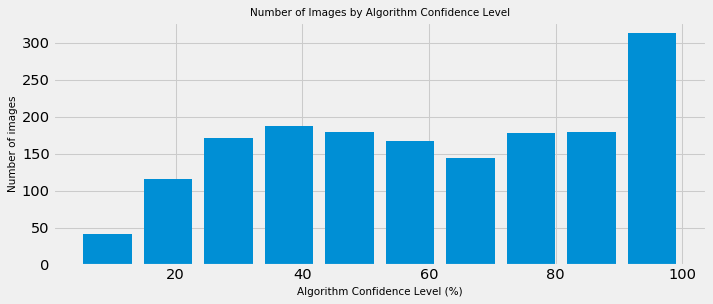

In [119]:
#This visualization is set to check the disbursement of number of images by the algorithm confidence level (on P1_conf) to determine the efficiency of the algorithim
matp.figure(figsize=(10,4), dpi = 75)
#Setting the labels
matp.xlabel('Algorithm Confidence Level (%)', fontsize = 10)
matp.ylabel('Number of images', fontsize=10)

#Setting the Title
matp.title('Number of Images by Algorithm Confidence Level', fontsize=10)
matp.style.use('fivethirtyeight')

#Setting the histogram parameters
matp.hist(mergetable['p1_conf'], rwidth = .8,bins = 10)
matp.show()
